In [1]:
import sys
import os


current_dir = os.path.dirname(os.path.realpath("main.ipynb"))
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))


sys.path.append(parent_dir)


In [2]:
from micrograd.value import Value
from graphviz import Digraph

In [3]:
a = Value(5.0)
b = Value(6.0)
c = a * b
d = Value(7.0)
e = Value(8.0)
f = d * e
g = c + f
print(g)

Value(data=86.0, grad=0)


In [4]:
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ data %.4f | grad %.4f }" % (n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

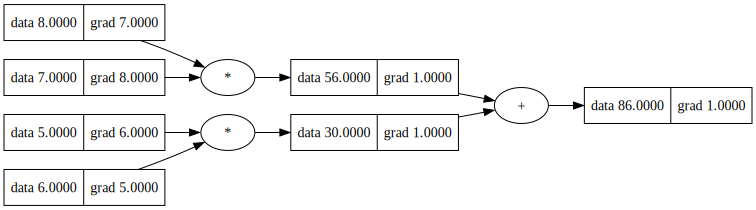

In [5]:

g.backward()
draw_dot(g)

Value(data=0.7310585786300049, grad=0)